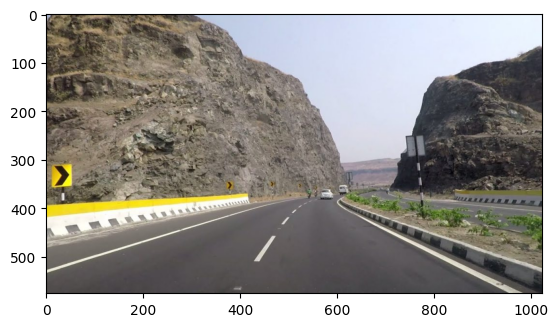

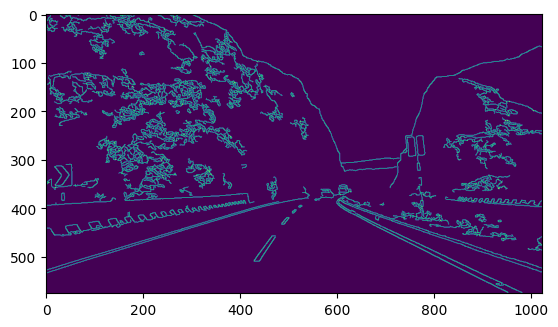

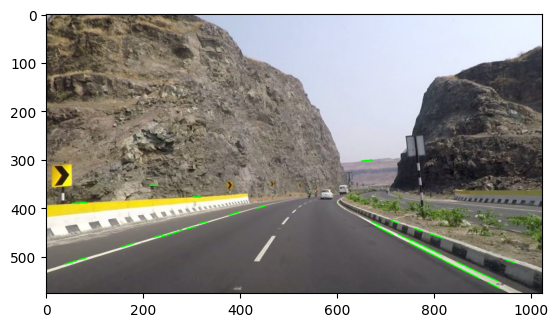

In [43]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#https://en.wikipedia.org/wiki/Vanishing_point


image = cv2.imread('./data/image.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blurGray = cv2.GaussianBlur(gray, (5, 5), 1)
# Generating Edge image
edgeGray = cv2.Canny(blurGray, 40, 255)

# Finding Lines in the image
lines = cv2.HoughLinesP(edgeGray, 1, np.pi / 180, 50, 10, 15)
lines.shape

plt.imshow(edgeGray)
plt.show()

_image = image.copy()
for Line in np.squeeze(lines):
            cv2.line(_image, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)

plt.imshow(_image)
plt.show()

In [44]:
def filter_lines(lines, angle_threshold):
    filtered_lines = []
    for line in lines:
        x1, y1, x2, y2 = line
        m = (y2 - y1) / (x2 - x1)
        angle = np.arctan(m)
        if abs(angle) > angle_threshold:
            filtered_lines.append(line)
        if abs(angle)-np.pi//2 > angle_threshold:
            filtered_lines.append(line)
    return filtered_lines

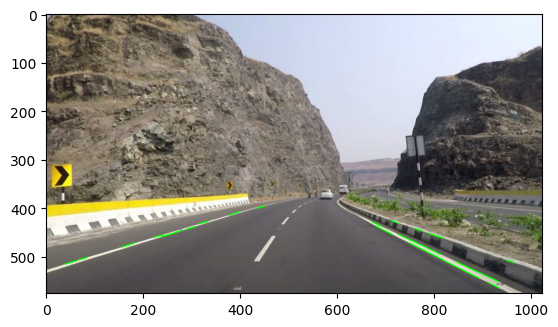

In [45]:
filtered_lines = filter_lines(np.squeeze(lines), 0.1)
for Line in np.squeeze(filtered_lines):
            cv2.line(image, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)

plt.imshow(image)
plt.show()

In [46]:
def find_intersecting_point(l1 ,l2):
    x1, y1, x2, y2 = l1
    x3, y3, x4, y4 = l2

    px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4)) / ((x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4))
    py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4)) / ((x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4))
    try:
        return list(map(int, (px,py)))
    except:
        return None

In [47]:
def is_line_within_threshold(point, line, threshold):
    x1, y1, x2, y2 = line 
    p1 = np.array([x1, y1])
    p2 = np.array([x2, y2])   
    p = np.array(point)
    d = p2 - p1
    u = np.dot(p - p1, d) / np.dot(d, d)
    closest_point = p1 + u * d
    distance = np.linalg.norm(p - closest_point)

    return distance <= threshold

intersection_point:  (598, 345)


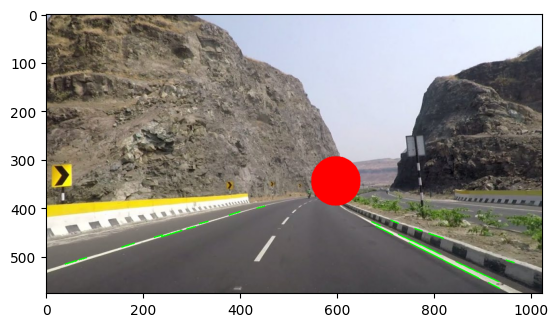

In [48]:
from itertools import combinations

line_combs = list(combinations(filtered_lines, 2))
n_attempts = len(line_combs)

for _ in range(n_attempts):
    idx = np.random.choice(range(n_attempts))
    l1, l2 = line_combs[idx]
    if find_intersecting_point(l1, l2) is None:
        continue
    x,y= find_intersecting_point(l1, l2)
    total_lines = 0
    max_lines = 0
    intersection_point = None
    for line in filtered_lines:
        if is_line_within_threshold([x,y], line, 100):
            total_lines += 1
    max_lines = max(max_lines, total_lines)
    if max_lines == total_lines:
        intersection_point = (x,y)

print("intersection_point: ", intersection_point)
image = cv2.circle(image, (x,y), radius=1, color=(255,0,0), thickness=100)
plt.imshow(image)